# Integration, Interpolation & Curve Fitting

In [59]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import *
from scipy.interpolate import interp1d, interp2d

# Integration

Integration

- define the function
- set the counts
- call quad()

In [60]:
def function(x):
    return 3*x**2+1.0

x_lower=0
x_upper=1

I,err=quad(function,x_lower,x_upper)
print("I: ",I)
print("error: ", err)

I:  2.0
error:  2.220446049250313e-14


# Interpolation

Interpolation to estimate data points between given set of discrete data points

In [61]:
#Generate some fake data
x_observed=np.linspace(0,10,20)
y_observed=np.cos(x_observed**2/8)

In [62]:
xx=np.linspace(0,10,1000)
yy=np.cos(xx**2/8)

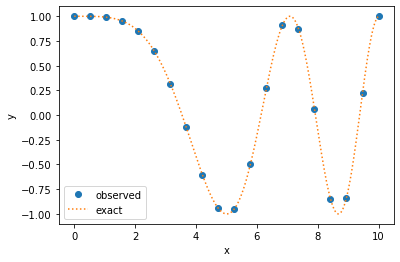

In [63]:
plt.plot(x_observed,y_observed, 'o',label='observed')
plt.plot(xx,yy,':', label='exact')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')

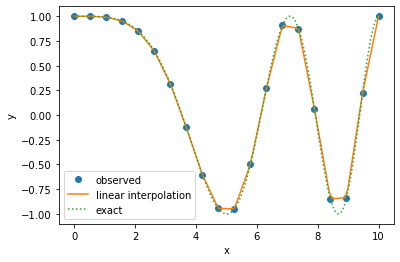

In [64]:
x_i = np.linspace(0,10,100)
#linear interpolation
f_lin=interp1d(x_observed,y_observed) # get interpolation function
y_i_lin=f_lin(x_i) # interpolate for y_i at x_i

plt.plot(x_observed,y_observed, 'o',label='observed')
plt.plot(x_i,y_i_lin, '-',label='linear interpolation')
plt.plot(xx,yy,':', label='exact')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')

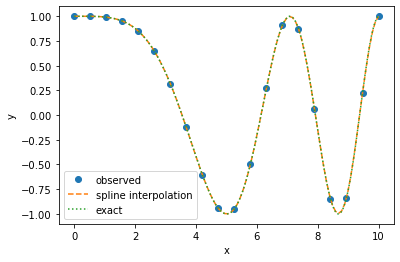

In [65]:
#spline interpolation
f_spl=interp1d(x_observed,y_observed, kind='cubic') # get interpolation function
y_i_spl=f_spl(x_i) # interpolate for y_i at x_i

plt.plot(x_observed,y_observed, 'o',label='observed')
plt.plot(x_i,y_i_spl, '--',label='spline interpolation')
plt.plot(xx,yy,':', label='exact')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')

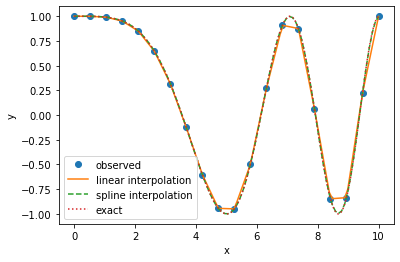

In [66]:
#comparison
plt.plot(x_observed,y_observed, 'o',label='observed')
plt.plot(x_i,y_i_lin, '-',label='linear interpolation')
plt.plot(x_i,y_i_spl, '--',label='spline interpolation')
plt.plot(xx,yy,':', label='exact')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')

# Curve Fitting

Fitting measured data to a model function.

Polynomial fits: np.polyfit(x,y,polynomialorder) and np.polyval(px)

- set your given x and y 
- get a polyfit object
- evaluate the polynomal using polyval

(-2.0, 2.0)

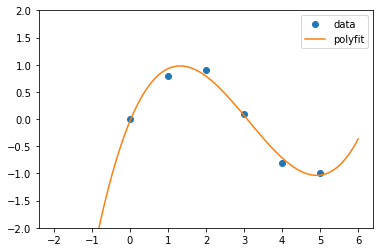

In [67]:
x_given=np.array([0,1,2,3,4,5])
y_given=np.array([0,0.8,0.9,0.1,-0.8,-1.0])

x_p=np.linspace(-2,6,100)
p_three=np.polyfit(x_given,y_given,3)
y_p=np.polyval(p_three,x_p)

plt.plot(x_given,y_given,'o')
plt.plot(x_p,y_p,'-')
plt.legend(['data','polyfit'],loc='best')
plt.ylim(-2,2)

# 2D Interpolation

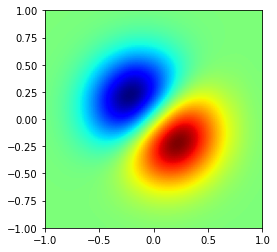

In [68]:
import pylab as py

def func(x,y):
    return (x+y)*np.exp(-5*(x**2+y**2))

x,y=np.mgrid[-1:1:15j, -1:1:15j]
fvals=func(x,y)

newfunc=interp2d(x,y,fvals,kind='cubic')

xx=np.linspace(-1,1,100)
yy=xx

fnew=newfunc(xx,yy)

# image plot
py.figure(1)
py.clf()
py.imshow(fnew,extent=[-1,1,-1,1], cmap=py.cm.jet)



# Miscellaneous Tools

[1.60849528] [5.32907052e-15]


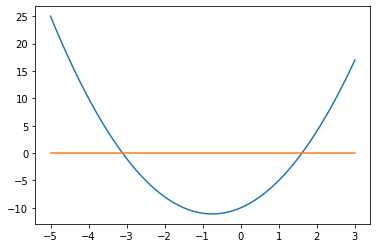

In [69]:
from scipy.optimize import fsolve

# fsolve useful for points of intersection

def quadratic(val):
    return 2*val**2+3*val-10
x=np.linspace(-5,3,100)
plt.plot(x,quadratic(x))
plt.plot(x, np.zeros(len(x)))

x=fsolve(quadratic,4) # fsolve(function,guess)
print(x, quadratic(x))

D_37:  POINT (1.785138818851461 0.37)


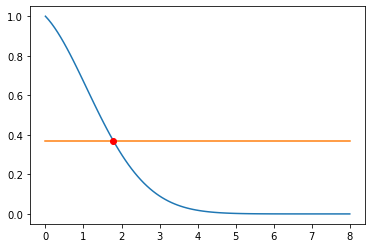

In [70]:
from shapely.geometry import LineString

def survival(a,b,x):
    return np.exp(-1*(a*x+b*x**2))
alpha=0.2
beta=0.2
dose=np.linspace(0,8,100)
y=survival(alpha,beta,dose)
yy=np.zeros(len(y))+0.37
plt.plot(dose,y)
plt.plot(dose,yy)

line_1=LineString(np.column_stack((dose,y)))
line_2=LineString(np.column_stack((dose,yy)))
intersection=line_1.intersection(line_2)

plt.plot(*intersection.xy, 'ro')

print("D_37: ", intersection)

# Fit Testing

R^2=1-var(model)/var(average)=1-sum(y_i-y_hat)**2/sum(y_i-y_bar)**2

Adjusted R^2=1-(1-R**2)(n-1)/(n-m-1)

R^2 value is a statistical measure of how close the data are to the fitted regression line. It's known as the coefficient of determination or the coefficient of multiple determination. 

In [71]:
import pandas as pd
import statsmodels.api as sm

data={"month":[12,11,10,9,8,7,6,5,4],"free_time":[120,110,100,90,80,85,60,50,40],"num_vid":[8,8,7,6,6,7,6,4,5]}

In [72]:
df=pd.DataFrame(data,columns=["month", "free_time", "num_vid"])

In [73]:
df.head()

,month,free_time,num_vid
0,12,120,8
1,11,110,8
2,10,100,7
3,9,90,6
4,8,80,6


In [74]:
x=df[["free_time"]]
y=df["num_vid"]
x=sm.add_constant(x)
model=sm.OLS(y,x).fit() 
# OLS stands for ordinary least square, takes the target variable then the matrix of features and need to use the .fit to fit the model to the data set
predictions=model.predict(x)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                num_vid   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     31.55
Date:                Sat, 01 Aug 2020   Prob (F-statistic):           0.000802
Time:                        13:45:39   Log-Likelihood:                -7.0819
No. Observations:                   9   AIC:                             18.16
Df Residuals:                       7   BIC:                             18.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7345      0.672      4.072      0.0

c:\users\aaron\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Our model explains 81.8% of the variance from the R^2. Max R^2 is 1. You want greater than 0.95. A limitation is that r^2 increases by adding independent variables to the model which is misleading since some added variables might be useless with minimal significance. Adjusted overcomes this issues by adding a penalty if we make an attempt to add an independent variable that does not improve the model. So adjusted r^2 is a modified version of r^2 and takes into account the number of predictors in the model. If useless predictors are added adjusted r^2 will decrease, if useful predictors are added the adjusted r^2 will increase. 

In [75]:
print(predictions)

0    8.022599
1    7.581921
2    7.141243
3    6.700565
4    6.259887
5    6.480226
6    5.378531
7    4.937853
8    4.497175
dtype: float64


RMSE = sqrt(sum_i^n[(y_i^hat-y_i)**2/n]) - a measure of the difference between true values and predicted values.

when reading these abreviations, read right to left: RMSE - find the Error, Sum it, Mean it, Root it. 
    
RMSLE=sqrt((1/m)*sum_(i=1)^n[log(y_i+1)-log(y_i^hat+1)**2])

MAE=(1/n)*sum_(i=1)^n[|y_i-y_i^hat|]

In [76]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error,mean_absolute_error

In [77]:
MAE=mean_absolute_error(predictions,y)
MSE=mean_squared_error(predictions,y)
RMSE=np.sqrt(MSE)
MSLE=mean_squared_log_error(predictions,y)
RMSLE=np.sqrt(MSLE)


In [78]:
print(MAE,MSE,RMSE,MSLE,RMSLE)

0.45825486503452617 0.2824858757062147 0.5314940034527339 0.007041391001511222 0.08391299661858836


To understand these, residual error is: y-y^hat - difference between actual and predicted errors. This is what people generally mean when they talk about errors. 

- Mean Absolute Error

assume actual value is 100 and predicted is 130, difference is -30, absolute error is 30. We don't account for direction. The MAE is the sum of absolute differences between actual and predicted values, so we'd do this calculation for all our ys and y^hats. When we consider directions also we call this mean bias error (MBE). 

- Mean Square Error

    - Always positive

    - closer to 0 is good. 

We calculate the difference as before, but now, we square the number to get the error, so -30 would have given 900. Then we do this for all ys and y^hats and take the mean. 

- Root Mean Square Error

Do as above but in addition you take the square root of the final result. 

- Root mean squared log error

As above but calculated in log scale. 1 is added as a constant to actual and predicted values because log of 0 is undefined and this prevents calculation problems. 

so we add 1 before doing calculations with yis and y^hats. then we take the logs of each. then we calculate the difference, then we square them, sum them, take the mean, then square root them. 

- Pros and Cons
    - MAE doesn't account for direction of value but MSE, RMSE and RMSLE do. 
    - MAE is less biased for higher values. So outliers will weight it. It may not adequately reflect the performance of regression when dealing with large error values. 
    - MSE is highly biased for higher values. RMSE is better in terms of reflecting performance in such cases. 
    - RMSE is more useful when lower residual values are preferred. It's versitile, it can deal with large and small errors. 
    - MAE doesn't necessarily penalise large errors but MSE and RMSE will. RMSLE doesn't penalise large errors but used when you don't want to influence the results if there are large errors. RMSLE penalises lower errors. 
    - When actual and predicated values are low the RMSE and RMSLE are usually the same When either of actual or predicted values are high RMSE>RMSLE
    - When actual and predicated values are low RMSE and RMSLE are usually the same. 
    - When either of actual or predicted values are high RMSE> RMSLE.

These are also known as loss functions in many contexts.

# Regression using simple algorithm and sklearn

Linear regression vs. logistic regression.

The type of function you're mapping to is the main point of difference, linear maps continuous x to continuous y, logistic maps continous x to binary y. 

- linear regression models:
    - data using a straight line, 
    - used with continuous variables, 
    - output prediction is the value of the variable 
    - accuracy and goodness of fit measured with loss, r^2, adjusted r^2...etc
    - When to use? 
        - Classification and regression capabilities: imagine you've fitted a line to a data set but new data points get added. The model now needs changed. It needs changed with each additional data point. So these models aren't good for such circumstances. 
        - Data quality: outliers will distrupt the outcome. 
        - Computational complexity: linear isn't usually complex.
        - Comprehensible and transparent: easily understandable by anybody. 
    - Typical uses: 
        - Evaluating trends and sales estimates.
        - Analysing the impact of price changes.
        - Assessment of risk in financial services and insurance domains.
    
- logistic regression
    - the probability of some obtained event is represented as a linear function of a combination of predictor variables. 
    - used with categorical variables
    - output is a probability of occurence of event
    - accuracy and goodness of fit measured by accuracy, precision, recall, f1 score (harmonic mean of precision and recall), ROC curve, confusion matrix...etc

# Finding the best fit line using simple linear regression. 

In [79]:
indat=pd.read_csv('headbrain.csv')

In [80]:
indat.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [81]:
x=indat['Head Size(cm^3)'].values
y=indat['Brain Weight(grams)'].values

In [82]:
# find a linear relationship between head size and brain weight

# means
mean_x=np.mean(x)
mean_y=np.mean(y)

# total number of values
n=len(x)

# using the formula to calculate m and c.
numerator=0
denominator=0

# m = SUM[(x-x_bar)(y-y_bar)]/SUM[(x-x_bar)^2]

for i in range(n):
    numerator += (x[i]-mean_x)*(y[i]-mean_y)
    denominator += (x[i]-mean_x)**2
    
m=numerator/denominator
c=mean_y-(m*mean_x)

print(m,c)

0.26342933948939945 325.57342104944223


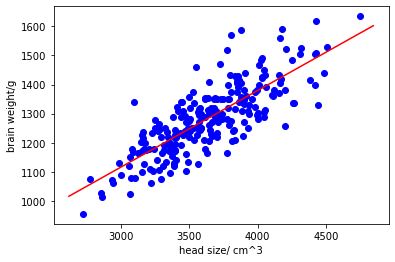

In [83]:
max_x=np.max(x) +100
min_x=np.min(x) -100

xx=np.linspace(min_x,max_x,100)
yy=m*xx+c

plt.plot(xx,yy,color="red")
plt.scatter(x,y,c='b',label='scatter plot')
plt.xlabel('head size/ cm^3')
plt.ylabel('brain weight/g')
plt.legend
plt.show()

In [84]:
ss_t=0
ss_r=0
for i in range(n):
    y_pred = m*x[i]+c
    ss_t += (y[i]-mean_y)**2
    ss_r += (y[i]-y_pred)**2
r2=1-(ss_r/ss_t)
print(r2)

0.6393117199570003


# Simple Machine Learning Fit

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
x=x.reshape((n,1))

regression=LinearRegression() 
# creates a linear regression object

regression=regression.fit(x,y) 
# calls a fit method, trains the model using a training set
print("gradient: ",regression.coef_,"intercept: ", regression.intercept_) 
y_prediction=regression.predict(x)
# predicts 
MSE=mean_squared_error(y,y_prediction)
RMSE=np.sqrt(MSE)
r2=regression.score(x,y)
print(MSE, RMSE, r2)

gradient:  [0.26342934] intercept:  325.5734210494426
5201.3840280023305 72.1206213783709 0.639311719957


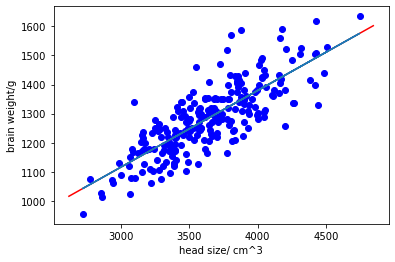

In [86]:
plt.plot(xx,yy,color="red")
plt.scatter(x,y,c='b',label='scatter plot')
plt.xlabel('head size/ cm^3')
plt.ylabel('brain weight/g')
plt.legend

plt.plot(x,y_prediction)
plt.show()

# Using RMSE

In [87]:
#generate some fake data
size = 20
true_intercept = 2
true_slope = 4
x_observed = np.linspace(0, 1, size)
y_observed = true_intercept + x_observed*true_slope + np.random.normal(scale=0.5, size=size)
n=len(x_observed)
# Using a polyfit
x_p=np.linspace(0,1,size)
p_three=np.polyfit(x_observed,y_observed,3)
y_p=np.polyval(p_three,x_p)

# MSE, RMSE
MSE=mean_squared_error(y_observed,y_p)
RMSE=np.sqrt(MSE)

print("poly MSE: ",MSE,"poly RMSE: ",RMSE)


poly MSE:  0.3152090163759791 poly RMSE:  0.5614347837246808


In [88]:
#generate some fake data
size = 20
true_intercept = 2
true_slope = 4
x_observed = np.linspace(0, 1, size)
y_observed = true_intercept + x_observed*true_slope + np.random.normal(scale=0.5, size=size)

n=len(x_observed)
mean_x=np.mean(x_observed)
mean_y=np.mean(y_observed)
numerator=0
denominator=0
for i in range(n):
    numerator += (x_observed[i]-mean_x)*(y_observed[i]-mean_y)
    denominator += (x_observed[i]-mean_x)**2
m=numerator/denominator
c=mean_y-(m*mean_x)
xx=np.linspace(0,1,size)
yy=m*xx+c

# MSE, RMSE
MSE=mean_squared_error(y_observed,yy)
RMSE=np.sqrt(MSE)
print("linear MSE: ",MSE,"linear RMSE: ",RMSE)

linear MSE:  0.14183910587607262 linear RMSE:  0.3766153287853173


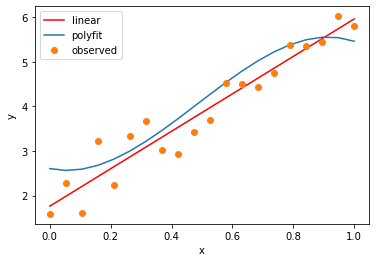

In [89]:
#plotting
plt.plot(xx,yy,color="red", label='linear')
plt.plot(x_p,y_p,'-', label='polyfit')    
plt.plot(x_observed,y_observed, 'o',label='observed')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')

# Multivariate Regression using sklearn

price=m1*area*+m2*bedrooms+m3*age +b - note in machine learning independent variables are sometimes called 'features', m1-m3 are coefficients, b is still an intercept and price is the dependent variable. 

In [90]:
df=pd.read_csv("houseprice.csv")

In [91]:
df.head()

,area,bedrooms,age,price,Unnamed: 4
0,2600,3.0,20,550000,NaN
1,3000,4.0,15,565000,NaN
2,3200,NaN,18,610000,NaN
3,3600,3.0,30,595000,NaN
4,4000,5.0,8,760000,NaN


first there's an anoying column with nan entries, need to get rid of those. then need to handle the nan entries in bedrooms, can either accept it and treat it using numpy nansafe functions, I'm just going to make it the median.

In [92]:
df= df.drop(columns="Unnamed: 4") # easy to remove

In [93]:
df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [94]:
import math
median_bedrooms=math.floor(df.bedrooms.median()) # taking the median and making it an integer, can't have half a bedroom

In [95]:
df.bedrooms=df.bedrooms.fillna(median_bedrooms) # fills nan values with something

In [96]:
df.head() 

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [97]:
reg=LinearRegression() # create the linear regression class object
reg.fit(df[["area", "bedrooms", "age"]], df.price) # (df[[independent variables]], target variable)

LinearRegression()

In [98]:
reg.coef_ # m1,m2,m3

array([  112.06244194, 23388.88007794, -3231.71790863])

In [99]:
reg.intercept_ #b

221323.00186540443

In [100]:
reg.predict([[3200,4,18]]) # predict 3000 sqr foot, with 3 bedrooms, 40 years old

array([615307.4140366])

In [101]:
price=reg.coef_[0]*3200+reg.coef_[1]*4+reg.coef_[2]*18+reg.intercept_

In [102]:
price

615307.4140365982

In [103]:
# not perfect, but the more data you input the better it gets. 